<a href="https://colab.research.google.com/github/tesfayeaberalingane-beep/Machine-Learning-Regression-Models-using-House-Price-Dataset/blob/main/house_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries are often pre-installed, but this ensures they are available
!pip install pandas numpy scikit-learn matplotlib seaborn

# Import essential libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

try:
    df = pd.read_csv('/content/Housing Price.csv') # Adjust filename
except FileNotFoundError:
    print("Dataset file not found. Ensure the path is correct or upload the file.")


In [ ]:

y = df['price']
X = df.drop('price', axis=1)


X = pd.get_dummies(X, drop_first=True)

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature Scaling (Crucial for Linear and KNN models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

print(f"Linear R2 Score: {r2_score(y_test, y_pred_linear):.4f}")
print(f"Linear MSE: {mean_squared_error(y_test, y_pred_linear):.2f}\n")

Linear R2 Score: 0.6529
Linear MSE: 1754318687330.67



In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5) # n_neighbors=5 is a common starting point
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print(f"KNN R2 Score: {r2_score(y_test, y_pred_knn):.4f}")
print(f"KNN MSE: {mean_squared_error(y_test, y_pred_knn):.2f}\n")

KNN R2 Score: 0.6134
KNN MSE: 1953996997258.20



In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train) # Using unscaled data X_train for simplicity
y_pred_tree = tree_model.predict(X_test)

print(f"Decision Tree R2 Score: {r2_score(y_test, y_pred_tree):.4f}")
print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred_tree):.2f}")

Decision Tree R2 Score: 0.4771
Decision Tree MSE: 2642802637614.68


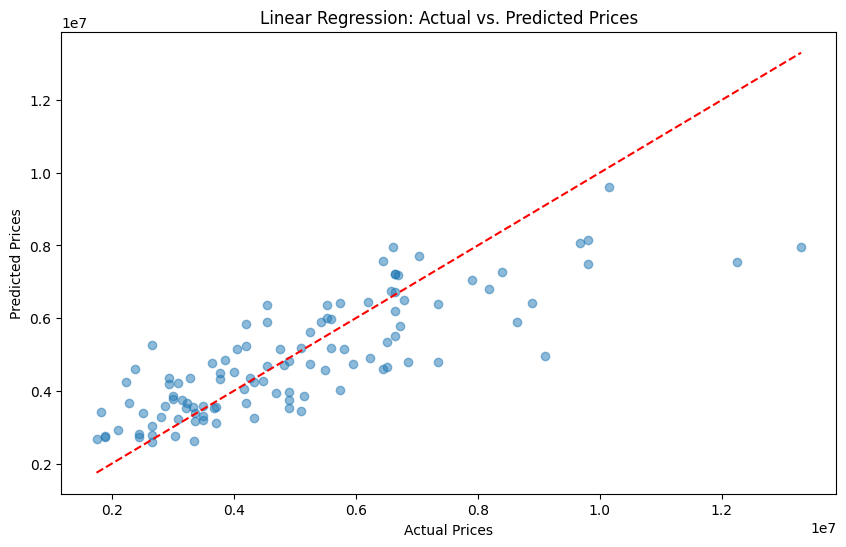

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression: Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()